In [ ]:
!pip3 install --upgrade pip
!pip3 install -r requirements.txt

In [ ]:
import os
 
from qiskit_ibm_runtime import QiskitRuntimeService
 
from dotenv import load_dotenv

# Carga las variables de entorno del archivo .env
load_dotenv()

token = os.getenv("QUANTUM_TOKEN")

# Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(channel="ibm_quantum", token=token, set_as_default=True)
 
# Load saved credentials
service = QiskitRuntimeService()
 

In [7]:
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler

# Create empty circuit
example_circuit = QuantumCircuit(2)
example_circuit.measure_all()

# You'll need to specify the credentials when initializing QiskitRuntimeService, if they were not previously saved.
service = QiskitRuntimeService()
backend = service.backend("ibmq_qasm_simulator")
sampler = Sampler(backend)
job = sampler.run([example_circuit])
print(f"job id: {job.job_id()}")
result = job.result()
print(result)

/Users/montevideo/code/QuantumPalindromes/Quantum/lib/python3.11/site-packages/qiskit_ibm_runtime/qiskit_runtime_service.py:879: UserWarning: Cloud simulators have been deprecated and will be removed on 15 May 2024. Use the new local testing mode in qiskit-ibm-runtime version 0.22.0 or later to meet your debugging needs.
  warnings.warn(warning_message)


job id: colu5f2iaqtdugvilqfg
PrimitiveResult([PubResult(data=DataBin(meas=BitArray(<shape=(), num_shots=4096, num_bits=2>)), metadata={'circuit_metadata': {}})], metadata={'version': 2})


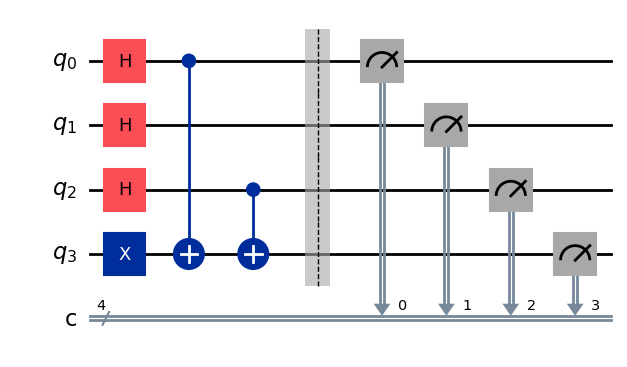

In [8]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator  # Correct way to import AerSimulator in Qiskit 1.0

# Create a quantum circuit with 4 qubits and 4 classical bits
circuit = QuantumCircuit(4, 4)

# Apply Hadamard gates to the first three qubits
circuit.h(0)
circuit.h(1)
circuit.h(2)

# Apply an X gate to the fourth qubit
circuit.x(3)

# Apply CNOT gates
circuit.cx(0, 3)
circuit.cx(2, 3)

# Add a barrier to all qubits
circuit.barrier()

# Measure all qubits
circuit.measure(0, 0)
circuit.measure(1, 1)
circuit.measure(2, 2)
circuit.measure(3, 3)

circuit.draw('mpl')


In [9]:
# Set up the simulator
simulator = AerSimulator()  # Updated instantiation

# Transpile the circuit for the simulator
transpiled_circuit = transpile(circuit, simulator)

# Run the transpiled circuit
job = simulator.run(transpiled_circuit)
result = job.result()

# Print the results
print(result.get_counts())



{'1101': 108, '0001': 121, '0110': 125, '0100': 151, '1010': 137, '1000': 131, '1111': 115, '0011': 136}
